In [27]:
import datetime
import yaml
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from metrics import numerical_metrics
%matplotlib inline

In [28]:
filename = 'test_CNN_dis_LSTM_gen20_34.npy'
filename_true = './data/Norm1.csv'
window = 400

In [29]:
Y = pd.read_csv(filename_true)
y = np.array(Y['DE'])
data_true = np.zeros((608, 400))
for i in range(608):
    data_true[i] = y[i*400:(i+1)*400]

In [30]:
data_true

array([[ 0.05319692,  0.08866154,  0.09971815, ...,  0.00521538,
        -0.04380923, -0.06133292],
       [-0.03692492,  0.00458954,  0.01460308, ..., -0.05611754,
        -0.05903815, -0.04255754],
       [-0.00375508,  0.02044431,  0.03316985, ...,  0.06905169,
         0.04380923,  0.06028985],
       ...,
       [-0.024408  , -0.00146031,  0.00458954, ...,  0.07739631,
         0.12454338,  0.15959077],
       [ 0.16856123,  0.14352738,  0.07301538, ..., -0.12725538,
        -0.13768615, -0.105768  ],
       [-0.04756431, -0.00876185,  0.02920615, ...,  0.04088862,
         0.08970462,  0.10222154]])

In [31]:
X = np.load(filename, mmap_mode='r')

In [32]:
X.shape

(608, 400, 1)

In [33]:
data = np.array(X.reshape((608,400)))

In [34]:
data

array([[-0.00892344, -0.01656558,  0.01181832, ..., -0.0206605 ,
        -0.03580822,  0.00122136],
       [-0.01173794,  0.00670007,  0.01457612, ..., -0.00776649,
         0.01549187,  0.00874177],
       [-0.0030337 , -0.00718705, -0.01720123, ..., -0.03230252,
        -0.01258898, -0.01715747],
       ...,
       [ 0.01057182, -0.00149164, -0.02092026, ..., -0.01505394,
         0.0045301 ,  0.0233257 ],
       [-0.01042081, -0.01189598, -0.00135793, ..., -0.0063125 ,
         0.00553022, -0.00022376],
       [-0.00428028,  0.0091535 , -0.01463068, ..., -0.0231955 ,
         0.00436647,  0.00676656]], dtype=float32)

In [10]:
p = data[0].plot.line()

AttributeError: 'memmap' object has no attribute 'plot'

In [12]:
measures = numerical_metrics.evaluate_all(data_true, data)

In [13]:
measures

{'mse': 0.005794470187896989,
 'rrse': 1.047273104371845,
 'std_ape': 104811130.7715869,
 'gmae': array([0.03848829, 0.04005277, 0.04070477, 0.04009847, 0.03842421,
        0.03787098, 0.03546249, 0.03814318, 0.04024321, 0.03795343,
        0.04014034, 0.03915179, 0.03684628, 0.03633884, 0.03722658,
        0.03798184, 0.03914315, 0.0385133 , 0.03847828, 0.03825947,
        0.03533223, 0.03785991, 0.03888131, 0.03600376, 0.0371931 ,
        0.03598583, 0.03645593, 0.03572734, 0.03580721, 0.03957863,
        0.03830799, 0.03586035, 0.03514849, 0.0354655 , 0.03726257,
        0.0368404 , 0.03433077, 0.03753321, 0.03600807, 0.03626291,
        0.03683101, 0.03677803, 0.03810869, 0.03750692, 0.03798887,
        0.03887165, 0.03895764, 0.03511652, 0.03728692, 0.03691391,
        0.03996464, 0.03680376, 0.03525027, 0.03581382, 0.03599384,
        0.03660604, 0.03580666, 0.03613788, 0.0338823 , 0.03476525,
        0.03805257, 0.03625536, 0.03754938, 0.03660018, 0.03592861,
        0.03974393,

In [48]:
data_true.max(),data_true.min()

(0.31125415384615385, -0.28663753846153844)

In [50]:
noise = np.random.uniform(data_true.min(), data_true.max(), (608,400))

In [52]:
measures_noise = metrics.evaluate_all(data_true, noise)

In [55]:
y1 = []
y2 = []
a = ['mape', 'gmrae', 'gmae', 'mrae', 'rmspe', 'std_ape', 'mpe', 'mre']
for item in metrics.METRICS:
    if item not in a:
        y1.append(measures[item])
        y2.append(measures_noise[item])

Text(0, 0.5, 'values')

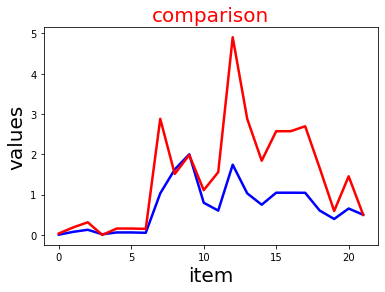

In [57]:
plt.plot(y1,lw=2.5,label="gan",color='blue')
plt.plot(y2,lw=2.5,label="noise",color='red')
plt.title("comparison",size=20,color='red')
plt.xlabel('item',size=20)
plt.ylabel('values',size=20)

In [35]:
from metrics.visualization_metrics import PCA_Analysis, tSNE_Analysis

In [36]:
PCA_Analysis(data_true, data)

AxisError: axis 1 is out of bounds for array of dimension 1

In [23]:
data_true.shape

(608, 400)

In [22]:
data.shape

(608, 400)

In [38]:
np.mean(data, axis=1).shape

(608,)